<a href="https://colab.research.google.com/github/mariareinaprado2000-hub/ESTADISTICA-II-2025/blob/main/Problemario_Estad%C3%ADstica_Inferencial_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1. Regresión lineal simple y correlación

## Medidas de dispersión
Suma de los cuadrados de las desviaciones de los valores de $X$ con respecto a su media:
$$ S_{xx} = \sum_{i=1}^{n} (X_i - \bar{X})^2 $$
Suma de los productos de las desviaciones de los valores de $X$ y $Y$ con respecto a sus medias:
$$S_{xy} = \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$
Suma de los cuadrados de las desviaciones de los valores de $Y$ con respecto a su media:
$$ S_{xx} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $$


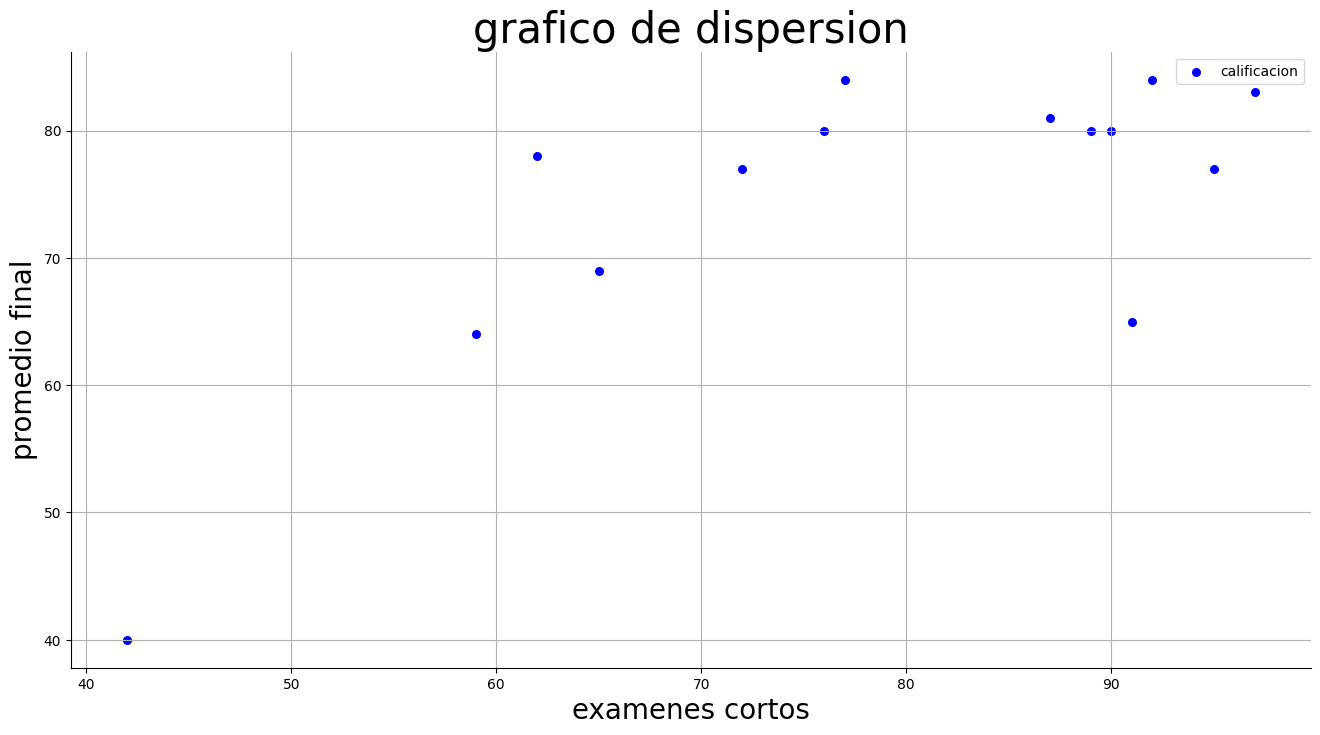

coeficiente de correlacion= 0.720591638459828
3483.714285714286
parametros: const              33.601124
examenes_cortos     0.522472
dtype: float64
Intervalo de confianza para b1 de  95%
 0.2063 < b1 <  0.8387

valor-p de Shapiro:  0.1703

valor_p de Breusch-Pagan:  0.1541

para x = 70, y = [70.1741573]
para x = 75, y = [72.78651685]
para x = 84, y = [77.48876404]



,df,sum_sq,mean_sq,F,PR(>F)
examenes_cortos,1.0,950.973515,950.973515,12.961118,0.003645
Residual,12.0,880.455056,73.371255,NaN,NaN


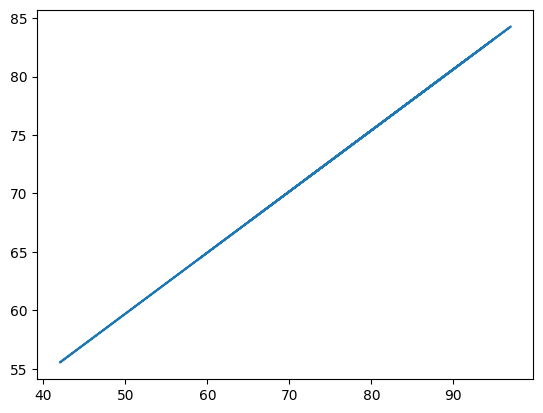

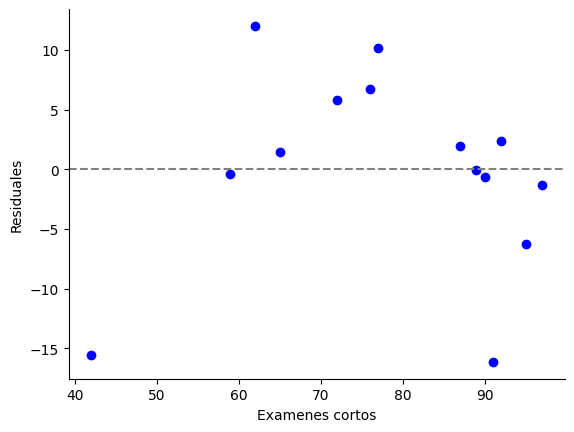

In [1]:
import pandas as pd
df = pd.DataFrame ({
    "examenes_cortos":[59,92,72,90,95,87,89,77,76,65,97,42,62,91],
    "promedio_final":[64,84,77,80,77,81,80,84,80,69,83,40,78,65]})
df
# inciso a) declarar variable dependiente e independiente
x= df["examenes_cortos"]
y= df["promedio_final"]
# inciso diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(x,y,label= "calificacion", color = "blue",s =30)
plt.xlabel("examenes cortos",fontsize=20)
plt.ylabel("promedio final",fontsize=20)
plt.title("grafico de dispersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.show()
Sxx = ((x-x.mean())**2).sum()
Syy=((y-y.mean())**2).sum()
sxy=((x-x.mean())*(y-y.mean())).sum()
from math import sqrt
r=sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=",r)


print(Sxx)
#r=...
#r2=r**2
#print ("coeficiente de diferenciacion:",r2)
#from sklearn.metrics import r2_score
#r2=r2_score (y,yc)

#6
import statsmodels.api as sm
X_constante = sm.add_constant(x)
modelo = sm.OLS(y,X_constante). fit()
print("parametros:",modelo.params)
yc = modelo.predict(X_constante)
plt.plot(x,yc)
#y= 24.53 + 0.643 x

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('Examenes cortos')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
print(f'para x = 70, y = {modelo.predict([1, 70])}')
print(f'para x = 75, y = {modelo.predict([1, 75])}')
print(f'para x = 84, y = {modelo.predict([1, 84])}\n')
#12
from statsmodels.formula.api import ols
modelo_lineal=ols('promedio_final~examenes_cortos',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

## Coeficiente de correlación y de determinación
Coeficiente de correlación de Pearson:
$$ r = \frac{S_{xy}}{\sqrt{S_{xx} \cdot S_{yy}}} $$
Coeficiente de determinación:
$$ r^2 $$

## Recta de regresión ajustada
La regresión lineal ajustada se representa mediante estadísticos:
$$ \hat{Y} = b_0 + b_1 X $$
donde $\hat{Y}$ representa el valor de $Y$ obtenido mediante la recta de regresión ajustada (no la verdadera $Y$). Los estadísticos $b_0$ y $b_1$ se calculan de la siguiente manera:

$$b_1 = \frac{S_{xy}}{S_{xx}}$$

$$ b_0 = \bar{Y} - b_1 \bar{X} $$

## Cálculo de residuales
Residuales:
$$e_i = Y_i - \hat{Y}_i$$

## Sumas de cuadrados SS (Sum of Squares)
Suma de los Cuadrados de los Errores:
$$ SSE = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 = \sum_{i=1}^n e_i^2$$
Suma total de cuadrados:
$$SST = \sum_{i=1}^{n} (Y_i - \bar{Y})^2$$
Suma de cuadrados de regresión:
$$SSR = \sum_{i=1}^{n} (\hat{Y_i} - \bar{Y})^2$$
- SST: Mide la variabilidad total de los datos observados.
- SSR: Mide la variabilidad de los datos que el modelo de regresión explica.
- SSE: Mide la variabilidad no explicada por el modelo (es decir, los residuos).


## Intervalo de confianza
Estadístico de prueba _t_:
$$t = \frac{b_1}{SE(b_1)}$$
Error estándar de $b_1$:
$$SE(b_1) = \frac{\sqrt{SSE / (n-2)}}   {\sqrt{S_{xx}} }$$
o
$$SE(b_1) = \frac{\sqrt{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2  / (n-2)}}   {\sqrt{S_{xx}} }$$

Intervalo de confianza para $b_1$:
$$b_1 - t_{\alpha/2} \cdot SE(b_1) \lt \beta_1 \lt b_1 + t_{\alpha/2} \cdot SE(b_1)$$
donde $n$ representa la cantidad de pares de datos.

## Comprobación de supuestos
Comprobar suposiciones:
- Test de shapiro a los residuales $e_i$: Para comprobar si la distribución es normal sobre la recta.
- Grafico $X$ vs $Y$: Para observar si los datos soportan la suposición de linealidad.
- Gráfico de residuales: Para observar si los datos soportan la suposición de linealidad, complementario al coeficiente de correlación
- Test de Breusch-Pagan: Para detectar heteroscedasticidad en regresion lineal

Test de Shapiro:<br>
`from scipy.stats import shapiro`<br>
Después, se obtiene el valor-p:<br>
`_, valor_p_sh = shapiro(data)`<br>
- $H_0$: Los datos siguen una distribución normal
- $H_1$: Los datos no siguen una distribución normal

Test de Breusch-Pagan:<br>
`from statsmodels.stats.api import het_breuschpagan`<br>
Después, se obtiene el valor-p:<br>
`_, valor_p_bp, _, _ = het_breuschpagan(residuales, X)`
- $H_0$: Hay homoscedasticidad
- $H_1$: Hay heteroscedasticidad

## ANOVA en regresión lineal

| Fuente de variación | Suma de cuadrados (SS) | Grados de libertad (df) | Promedio de los cuadrados (MS) | Estadístico F |
|---------------------|------------------------|--------------------------|--------------------------------|---------------|
| Regresión  | $ SSR$ | $p$ | $MSR = \frac{SSR}{p}$ | $F = \frac{MSR}{MSE}$|
| Error | $SSE$| $n - p - 1 $| $MSE = \frac{SSE}{n - p - 1} $|     |
| Total | $SST $| $n - 1$|             |        |

donde $p$ es el número de parámetros para la recta de regresión ajustada (en la regresión simple $p=1$). Las hipótesis son:
$$H_0: \beta_1 = 0$$
$$H_1: \beta_1 \ne 0 $$

## Problemario de la Unidad 1

### Problema 1
Un profesor intenta mostrar a sus estudiantes la importancia de los exámenes cortos, aun cuando el 90% de la calificación final esté determinada por los exámenes parciales. Él cree que cuanto más altas sean las calificaciones de los exámenes cortos, más alta será la calificación final. Seleccionó una muestra aleatoria de 15 estudiantes de su clase con los siguientes datos:

| Promedio de exámenes cortos | Promedio final |
|--------------|--------------|
| 59 | 64 |
| 92 | 84 |
| 72 | 77 |
| 90 | 80 |
| 95 | 77 |
| 87 | 81 |
| 89 | 80 |
| 77 | 84 |
| 76 | 80 |
| 65 | 69 |
| 97 | 83 |
| 42 | 40 |
| 94 | 78 |
| 62 | 65 |
| 91 | 90 |



1.   Establesca una variable dependiente ($Y$) y una variable independiente ($X$).
2.   Realice un diagrama de dispersión para estos datos.
3. ¿Los datos soportan la suposición de linealidad?
4. Calcule el coeficiente de correlación e interprete el resultado.
5. Calcule el coeficiente de determinación e interprete el resultado.
6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ($b_1$)
8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
9. Realice la prueba de Shapiro para los residuales y comente el resultado.
10. Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
12. Realice una tabla ANOVA e interprete el resultado.



coeficiente de correlacion= PearsonRResult(statistic=np.float64(0.8646014213752983), pvalue=np.float64(3.1971844162345565e-05))
parametros: const              24.526822
examenes_cortos     0.643180
dtype: float64
coeficiente de determinacion: 0.7475356178441863


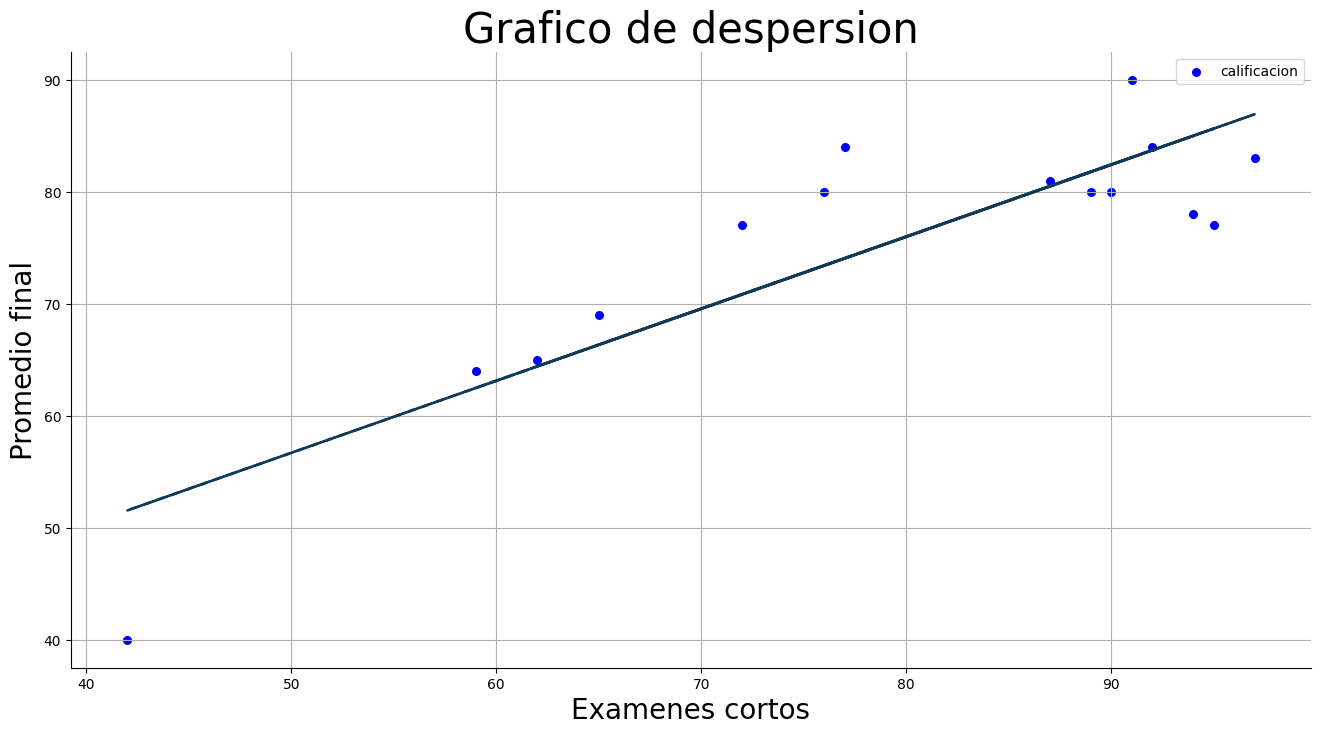


coeficiente de determinacion= 0.7475

 intervalo de confianza:                         0          1
const            6.441997  42.611646
examenes_cortos  0.419219   0.867141
valor_p(shapiro)= 0.901827735700704
valor_p de Breusch-Pagan:  0.2289

x=70, [69.54941193]


,df,sum_sq,mean_sq,F,PR(>F)
examenes_cortos,1.0,1538.228959,1538.228959,38.492412,0.000032
Residual,13.0,519.504375,39.961875,NaN,NaN


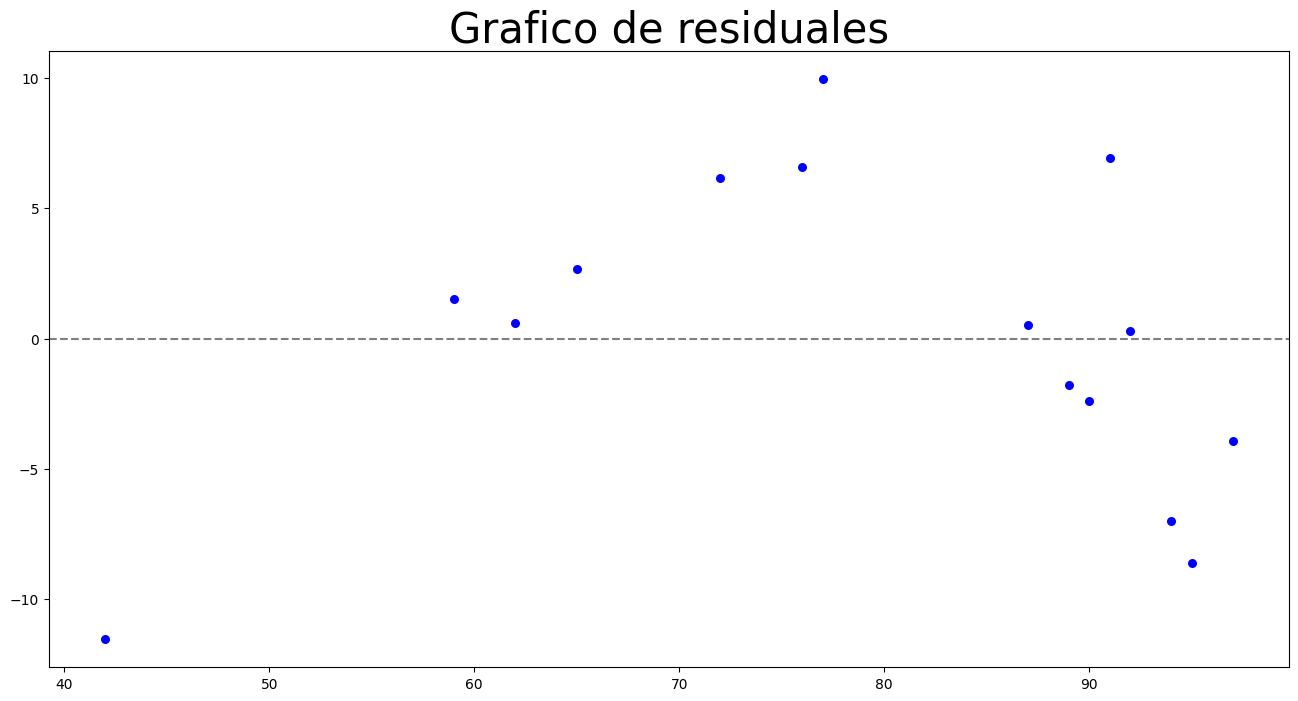

In [2]:
import pandas as pd
df=pd.DataFrame({
    "examenes_cortos":[59,92,72,90,95,87,89,77,76,65,97,42,94,62,91],
    "promedio_final":[64,84,77,80,77,81,80,84,80,69,83,40,78,65,90]
    })
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["examenes_cortos"]
y=df["promedio_final"]
#2) grafica de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(x,y,label="calificacion",color="blue",s=30)
plt.xlabel("Examenes cortos",fontsize=20)
plt.ylabel("Promedio final",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#plt.show()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#Calcule el coeficiente de determinación e interprete el resultado
#Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(x,residuales,label="calificacion",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
#9
from scipy.stats import shapiro
estadistico_shapro,valor_p_shapiro=shapiro(residuales)
print("valor_p(shapiro)=",valor_p_shapiro)

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
print("x=70,",modelo.predict([1,70]))
from statsmodels.formula.api import ols
modelo_lineal=ols("promedio_final~examenes_cortos",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Problema 2
William Hawkins, vicepresidente de personal de la International Motors, trabaja en la relación entre el salario de un trabajador y el porcentaje de ausentismo. Hawkins dividió el intervalo de salarios de International en 12 grados o niveles (1 es el menor grado, 12 el más alto) y después muestreó aleatoriamente a un grupo de trabajadores. Determinó el grado de salario de cada trabajador y el número de días que ese empleado había faltado en los últimos 3 años.

| Categoría de salario | 11 | 10 | 8  | 5  | 9  | 7  | 3  |
|----------------------|----|----|----|----|----|----|----|
| Ausencias           | 18 | 17 | 29 | 36 | 11 | 28 | 35 |

| Categoría de salario | 11 | 8  | 7  | 2  | 9  | 8  | 3  |
|----------------------|----|----|----|----|----|----|----|
| Ausencias           | 14 | 20 | 32 | 39 | 16 | 31 | 40 |

1.   Establesca una variable dependiente ($Y$) y una variable independiente ($X$).
2.   Realice un diagrama de dispersión para estos datos.
3. ¿Los datos soportan la suposición de linealidad?
4. Calcule el coeficiente de correlación e interprete el resultado.
5. Calcule el coeficiente de determinación e interprete el resultado.
6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ($b_1$)
8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
9. Realice la prueba de Shapiro para los residuales y comente el resultado.
10. Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados.
12. Realice una tabla ANOVA e interprete el resultado.

coeficiente de correlacion= PearsonRResult(statistic=np.float64(-0.8801262960169057), pvalue=np.float64(3.292893088695302e-05))
parametros: const        14.058843
Ausencias    -0.261814
dtype: float64
coeficiente de determinacion: 0.7746222969404378


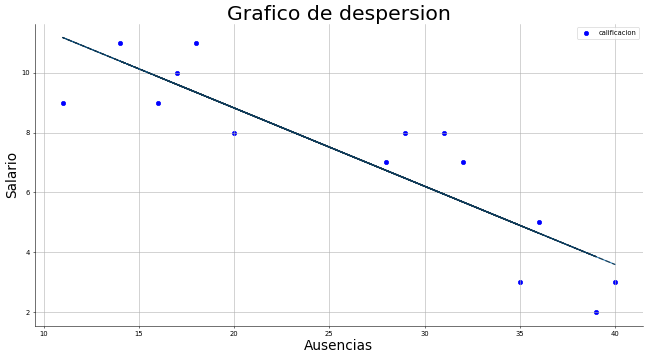


coeficiente de determinacion= 0.7746

 intervalo de confianza:                    0          1
const      11.587445  16.530241
Ausencias  -0.350638  -0.172989
x=12, [10.91707921]
x=70 [-4.26811431]


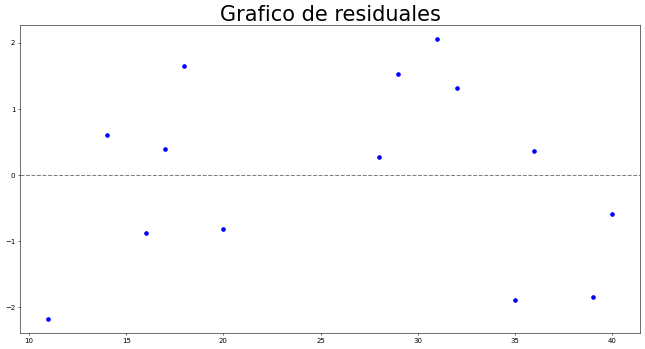

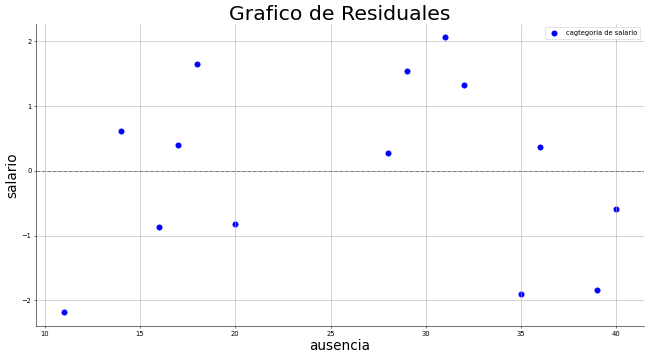

valor_p de Breusch-Pagan:  0.8955

x=12 [10.91707921]
x=70 [-4.26811431]


,df,sum_sq,mean_sq,F,PR(>F)
Ausencias,1.0,87.034348,87.034348,41.243954,0.000033
Residual,12.0,25.322795,2.110233,NaN,NaN


In [3]:
import pandas as pd
df=pd.DataFrame ({"Salario":[11,10,8,5,9,7,3,11,8,7,2,9,8,3],
                  "Ausencias":[18,17,29,36,11,28,35,14,20,32,39,16,31,40]
                  })
df
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["Ausencias"]
y=df["Salario"]
#2) Grafica de dispercion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=49)
plt.scatter(x,y,label="calificacion",color="blue",s=40)
plt.xlabel("Ausencias",fontsize=20)
plt.ylabel("Salario",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#5)Calcule el coeficiente de determinación e interprete el resultado
#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7)
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8)
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=50)
plt.scatter(x,residuales,label="categoria de salario",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
print ("x=12,",modelo.predict([1,12]))
print ("x=70",modelo.predict([1,70]))
#9)import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="cagtegoria de salario", color="blue",s=60)
plt.xlabel("ausencia", fontsize=20)
plt.ylabel("salario", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p
#interpolar confiable xe[11,40]   extrapolar no tanto

# 11

print("x=12",modelo.predict([1,12]))
print("x=70",modelo.predict([1,70]))
#el modelo será confiable si tiene homoscedasticidad, normalidad,linealidad{residuales}
#para interpolar debe haber correlación para exterpolar debe cumplir con todos los supuestos(usar con precausión)

#12
from statsmodels.formula.api import ols
modelo_lineal=ols('Salario~Ausencias',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Problema 3
A menudo, quienes hacen la contabilidad de costos estiman los gastos generales con base en el nivel de producción. En Standard Knitting Co. han reunido información acerca de los gastos generales y las unidades producidas en diferentes plantas.

| Gastos generales | 191 | 170 | 272 | 155 | 280 | 173 | 234 | 116 | 153 | 178 |
|------------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Unidades        |  40 |  42 |  53 |  35 |  56 |  39 |  48 |  30 |  37 |  40 |

1.   Establesca una variable dependiente ($Y$) y una variable independiente ($X$).
2.   Realice un diagrama de dispersión para estos datos.
3. ¿Los datos soportan la suposición de linealidad?
4. Calcule el coeficiente de correlación e interprete el resultado.
5. Calcule el coeficiente de determinación e interprete el resultado.
6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ($b_1$)
8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
9. Realice la prueba de Shapiro para los residuales y comente el resultado.
10. Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados.
12. Realice una tabla ANOVA e interprete el resultado.


In [4]:
import pandas as pd
df=pd.DataFrame ({"Gastos generales":[191,170,272,155,280,173,234,116,153,178],
                  "Unidades":[40,42,53,35,56,39,48,30,37,40]
                  })
df
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["Gastos generales"]
y=df["Unidades"]
#2) Grafica de dispercion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=49)
plt.scatter(x,y,label="calificacion",color="blue",s=40)
plt.xlabel("gastos",fontsize=20)
plt.ylabel("unidades",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#5)Calcule el coeficiente de determinación e interprete el resultado
#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7)
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8)
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=50)
plt.scatter(x,residuales,label="categoria de salario",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
print ("x=12,",modelo.predict([1,12]))
print ("x=70",modelo.predict([1,70]))
#9)import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="cagtegoria de salario", color="blue",s=60)
plt.xlabel("ausencia", fontsize=20)
plt.ylabel("salario", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()
# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p
#interpolar confiable xe[11,40]   extrapolar no tanto

# 11

print("x=12",modelo.predict([1,12]))
print("x=70",modelo.predict([1,70]))
#el modelo será confiable si tiene homoscedasticidad, normalidad,linealidad{residuales}
#para interpolar debe haber correlación para exterpolar debe cumplir con todos los supuestos(usar con precausión)

#12
from statsmodels.formula.api import ols
modelo_lineal=ols('Unidades~`Gastos generales`',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

KeyError: 'gastos generales'

In [ ]:
import pandas as pd
df=pd.DataFrame ({"Gastos generales":[191,170,272,155,280,173,234,116,153,178],
                  "Unidades":[40,42,53,35,56,39,48,30,37,40]
                  })
df
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["gastos generales"]
y=df["unidades"]
#2) Grafica de dispercion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=49)
plt.scatter(x,y,label="calificacion",color="blue",s=40)
plt.xlabel("gastos",fontsize=20)
plt.ylabel("unidades",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#5)Calcule el coeficiente de determinación e interprete el resultado
#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7)
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8)
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=50)
plt.scatter(x,residuales,label="categoria de salario",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
print ("x=12,",modelo.predict([1,12]))
print ("x=70",modelo.predict([1,70]))
#9)import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="cagtegoria de salario", color="blue",s=60)
plt.xlabel("ausencia", fontsize=20)
plt.ylabel("salario", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()
# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p
#interpolar confiable xe[11,40]   extrapolar no tanto

# 11

print("x=12",modelo.predict([1,12]))
print("x=70",modelo.predict([1,70]))
#el modelo será confiable si tiene homoscedasticidad, normalidad,linealidad{residuales}
#para interpolar debe haber correlación para exterpolar debe cumplir con todos los supuestos(usar con precausión)

#12
from statsmodels.formula.api import ols
modelo_lineal=ols('Unidades~`Q(Gastos generales)`',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Problema 4
Las ventas de línea blanca varían según el estado del mercado de casas nuevas: cuando las ventas de casas nuevas son buenas, también lo son las de lavaplatos, lavadoras de ropa, secadoras y refrigeradores.
Una asociación de comercio compiló los siguientes datos históricos (en miles de unidades) de las ventas de línea blanca y la construcción de casas.

| Construcción de casas (miles) | Ventas de línea blanca (miles) |
|-------------------------------|--------------------------------|
| 2.0                           | 5.0                            |
| 2.5                           | 5.5                            |
| 3.2                           | 6.0                            |
| 3.6                           | 7.0                            |
| 3.7                           | 7.2                            |
| 4.0                           | 7.7                            |
| 4.2                           | 8.4                            |
| 4.6                           | 9.0                            |
| 4.8                           | 9.7                            |
| 5.0                           | 10.0                           |

1.   Establesca una variable dependiente ($Y$) y una variable independiente ($X$).
2.   Realice un diagrama de dispersión para estos datos.
3. ¿Los datos soportan la suposición de linealidad?
4. Calcule el coeficiente de correlación e interprete el resultado.
5. Calcule el coeficiente de determinación e interprete el resultado.
6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ($b_1$)
8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
9. Realice la prueba de Shapiro para los residuales y comente el resultado.
10. Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados.
12. Realice una tabla ANOVA e interprete el resultado.

In [ ]:
import pandas as pd
df=pd.DataFrame ({"Gastos generales":[191,170,272,155,280,173,234,116,153,178],
                  "Unidades":[40,42,53,35,56,39,48,30,37,40]
                  })
df
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["gastos generales"]
y=df["unidades"]
#2) Grafica de dispercion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=49)
plt.scatter(x,y,label="calificacion",color="blue",s=40)
plt.xlabel("gastos",fontsize=20)
plt.ylabel("unidades",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#5)Calcule el coeficiente de determinación e interprete el resultado
#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7)
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8)
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=50)
plt.scatter(x,residuales,label="categoria de salario",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
print ("x=12,",modelo.predict([1,12]))
print ("x=70",modelo.predict([1,70]))
#9)import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="cagtegoria de salario", color="blue",s=60)
plt.xlabel("ausencia", fontsize=20)
plt.ylabel("salario", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()
# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p
#interpolar confiable xe[11,40]   extrapolar no tanto

# 11

print("x=12",modelo.predict([1,12]))
print("x=70",modelo.predict([1,70]))
#el modelo será confiable si tiene homoscedasticidad, normalidad,linealidad{residuales}
#para interpolar debe haber correlación para exterpolar debe cumplir con todos los supuestos(usar con precausión)

#12
from statsmodels.formula.api import ols
modelo_lineal=ols('Unidades~`Q(Gastos generales)`',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Problema 5
William C. Andrews, consultor de comportamiento organizacional de Victory Motorcycles, ha diseñado una prueba para mostrar a los supervisores de la compañía los peligros de sobrevigilar a sus trabajadores.
Un trabajador de la línea de ensamble tiene a su cargo una serie de tareas complicadas. Durante el desempeño del trabajador, un inspector lo interrumpe constantemente para ayudarlo a terminar las tareas.
El trabajador, después de terminar su trabajo, recibe una prueba psicológica diseñada para medir la hostilidad del trabajador hacia la autoridad
(una alta puntuación implica una hostilidad baja). A ocho distintos trabajadores se les asignaron las tareas y luego se les interrumpió para darles instrucciones útiles un número variable de veces (línea X).
Sus calificaciones en la prueba de hostilidad se dan en el renglón Y.

| número interrupciones al trabajador |  5  | 10  | 10  | 15  | 15  | 20  | 20  | 25  |
|-----------------------------------------|----|----|----|----|----|----|----|----|
| calificación del trabajador en la prueba de hostilidad | 58  | 41  | 45  | 27  | 26  | 12  | 16  |  3  |

1.   Establesca una variable dependiente ($Y$) y una variable independiente ($X$).
2.   Realice un diagrama de dispersión para estos datos.
3. ¿Los datos soportan la suposición de linealidad?
4. Calcule el coeficiente de correlación e interprete el resultado.
5. Calcule el coeficiente de determinación e interprete el resultado.
6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ($b_1$)
8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
9. Realice la prueba de Shapiro para los residuales y comente el resultado.
10. Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados.
12. Realice una tabla ANOVA e interprete el resultado.

In [6]:
import pandas as pd
df=pd.DataFrame ({"Gastos generales":[5,10,10,15,15,20,20,25],
                  "Unidades":[58,41,45,27,26,12,16,3]
                  })
df
#1) inciso a) Establesca una variable dependiente (y) e independiente (x)
x=df["gastos generales"]
y=df["unidades"]
#2) Grafica de dispercion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8),dpi=49)
plt.scatter(x,y,label="calificacion",color="blue",s=40)
plt.xlabel("gastos",fontsize=20)
plt.ylabel("unidades",fontsize=20)
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#3)¿Los datos soportan la suposición de linealidad? no soporta
#4)Calcule el coeficiente de correlación e interprete el resultado
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coeficiente de correlacion=",pearsonr(x,y))

#5)Calcule el coeficiente de determinación e interprete el resultado
#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)
plt.plot(x,yc)
r2=r2_score(y,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)
plt.show()
print("\ncoeficiente de determinacion=",round(r2,4))
#7)
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:",intervalo_de_confianza)
#8)
residuales=modelo.resid
plt.figure(figsize=(16,8),dpi=50)
plt.scatter(x,residuales,label="categoria de salario",color="blue",s=30)
plt.title("Grafico de residuales",fontsize=30)
#plt.show()
plt.axhline(y=0,color="gray",linestyle="--")
print ("x=12,",modelo.predict([1,12]))
print ("x=70",modelo.predict([1,70]))
#9)import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="cagtegoria de salario", color="blue",s=60)
plt.xlabel("ausencia", fontsize=20)
plt.ylabel("salario", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()
# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
#inidica que si hay homoscedasticidad por el valor_p
#interpolar confiable xe[11,40]   extrapolar no tanto

# 11

print("x=12",modelo.predict([1,12]))
print("x=70",modelo.predict([1,70]))
#el modelo será confiable si tiene homoscedasticidad, normalidad,linealidad{residuales}
#para interpolar debe haber correlación para exterpolar debe cumplir con todos los supuestos(usar con precausión)

#12
from statsmodels.formula.api import ols
modelo_lineal=ols('Unidades~`Q(Gastos generales)`',data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

KeyError: 'gastos generales'